In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/data-sets/IMDB_Dataset.csv')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data-sets/IMDB_Dataset.csv")
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


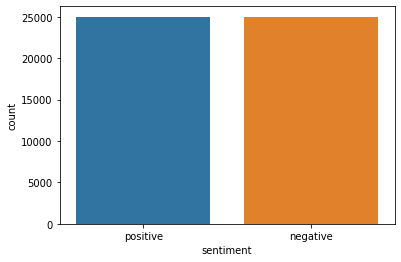

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object


In [ ]:
sns.countplot(x=df["sentiment"])
plt.show()

X = df["review"]
Y = df["sentiment"]

print(Y)

In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
Y = le.fit_transform(Y)
print("Vocab's labels vector: ", Y, Y.shape)

Vocab's labels vector:  [1 1 1 ... 0 0 0] (50000,)


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer


max_words = 1000
tkn = Tokenizer(num_words=max_words)
tkn.fit_on_texts(X_train)
seq = tkn.texts_to_sequences(X_train)

In [ ]:
seq
print(len(seq))

40000


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


max_len = 200
padded_docs = pad_sequences(seq, padding = 'pre', maxlen= max_len)
print(padded_docs)

[[  0   0   0 ...  12  27   5]
 [  0   0   0 ... 452   4  56]
 [  0   0   0 ... 142   8   3]
 ...
 [  2 262  24 ... 229  42   4]
 [  0   0   0 ...  48  11   6]
 [  0   0   0 ...  42   4 448]]


In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding


embedding_vector_features = 30
model = Sequential()
model.add(Embedding(max_words, embedding_vector_features, input_length=max_len))
model.add(LSTM(256))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 30)           30000     
                                                                 
 lstm_1 (LSTM)               (None, 256)               293888    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 324,145
Trainable params: 324,145
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(padded_docs,Y_train,batch_size=128,epochs=10, validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 11s 31ms/step - loss: 0.5568 - accuracy: 0.7066 - val_loss: 0.3687 - val_accuracy: 0.8378
Epoch 2/10
250/250 [==============================] - 7s 27ms/step - loss: 0.3814 - accuracy: 0.8313 - val_loss: 0.3535 - val_accuracy: 0.8537
Epoch 3/10
250/250 [==============================] - 7s 27ms/step - loss: 0.3219 - accuracy: 0.8647 - val_loss: 0.3344 - val_accuracy: 0.8591
Epoch 4/10
250/250 [==============================] - 7s 28ms/step - loss: 0.3113 - accuracy: 0.8686 - val_loss: 0.3278 - val_accuracy: 0.8574
Epoch 5/10
250/250 [==============================] - 7s 28ms/step - loss: 0.3037 - accuracy: 0.8723 - val_loss: 0.3498 - val_accuracy: 0.8556
Epoch 6/10
250/250 [==============================] - 8s 31ms/step - loss: 0.2920 - accuracy: 0.8763 - val_loss: 0.3341 - val_accuracy: 0.8579
Epoch 7/10
250/250 [==============================] - 7s 28ms/step - loss: 0.2822 - accuracy: 0.8809 - val_loss: 0.3510 - val_accuracy: 0.860

In [ ]:
# Test Set 

text_seq = tkn.texts_to_sequences(X_test)
test_padded = pad_sequences(text_seq, maxlen = max_len)

accr = model.evaluate(test_padded, Y_test)
print(accr)

313/313 [==============================] - 2s 7ms/step - loss: 0.3093 - accuracy: 0.8668
[0.30932125449180603, 0.8668000102043152]


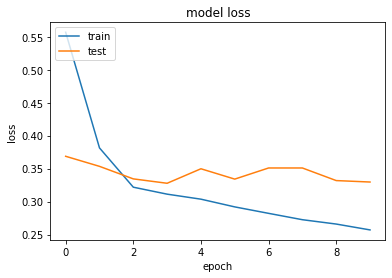

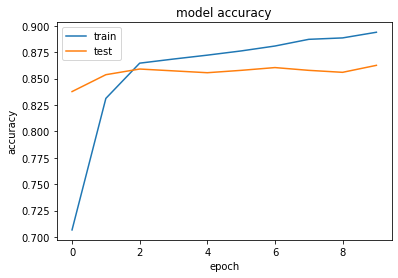

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# AbNegative rating (3 of 10)
import numpy as np


comment1 = """I'm not sure what accomplished director/producer/cinematographer Joshua Caldwell was thinking taking on this project.
This film has got to be the epitome of terrible writing and should be a classroom example of 'what not to do' when writing a screenplay. 
Why would Joshua take on (clearly) amateur writer Adam Gaines script is beyond me. 
Even his good directing and excellent cinematography could not save this disaster.
Aside from the super obvious plot holes and very poor story overall, the dragged-out unnecessary dialogue made this film unbearable and extremely boring. 
The way too long 1h 39min film length felt like 4 hours and I found myself saying "get on with it already, who cares!" when the two leads would just ramble on about nothing relevant. 
This movie may have been interesting if it was a 30 min short film (which oddly enough is the only minimal writing experience Adam Gaines has).
The acting was decent and Katia Winter was very easy on the eyes to look at, but her chemistry with Simon Quarterman was very unconvincing. 
Maybe it was the boring dialogue they had that made their chemistry absent.
Even the maybe total of 10 minutes of action scenes were overly dragged out. 
The rest of the film was primarily useless garbage dialogue with absolutely no point to the story - start to finish.
Don't waste your time with this one. See the trailer, and that's all the good and interesting parts you'll need to see.
This gets a 3/10 strictly for the directing and cinematography."""

comment2 = "This was the best movie I have ever seen"


text_seq = tkn.texts_to_sequences(comment2)
test_padded = pad_sequences(text_seq, maxlen = max_len)

single_sentence_probas = model.predict(test_padded)
print(len(single_sentence_probas))
predicted_class_label = np.argmax(single_sentence_probas)


print(predicted_class_label)

40
3
